In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Preprocessing

In [7]:
#Fill Null Values
data.fillna(data['Age'].median(), inplace = True)
data.fillna(data['Cabin'].mode()[0], inplace = True)
data.fillna(data['Embarked'].mode()[0], inplace = True)

In [8]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
data['Name'].nunique()

891

In [10]:
data['Ticket'].nunique()

681

In [11]:
data['Cabin'].nunique()

148

In [12]:
data['Embarked'].nunique()

4

In [13]:
#Encoding
from sklearn import preprocessing
label = preprocessing.LabelEncoder()  
data['Name']= label.fit_transform(data['Name'])
data['Ticket']=label.fit_transform(data['Ticket'])

In [14]:
data['Cabin'].unique()

array([28.0, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

In [15]:
data['Cabin']=data['Cabin'].astype('string')

In [16]:
data['Cabin'].unique()

<StringArray>
[       '28.0',         'C85',        'C123',         'E46',          'G6',
        'C103',         'D56',          'A6', 'C23 C25 C27',         'B78',
 ...
        'B102',         'B69',         'E49',         'C47',         'D28',
         'E17',         'A24',         'C50',         'B42',        'C148']
Length: 148, dtype: string

In [17]:
data['Cabin']=label.fit_transform(data['Cabin'])

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,male,22.0,1,0,523,7.2500,0,S
1,2,1,1,190,female,38.0,1,0,596,71.2833,82,C
2,3,1,3,353,female,26.0,0,0,669,7.9250,0,S
3,4,1,1,272,female,35.0,1,0,49,53.1000,56,S
4,5,0,3,15,male,35.0,0,0,472,8.0500,0,S


In [19]:
data = pd.get_dummies(data, columns = ['Sex',])

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,108,22.0,1,0,523,7.2500,0,S,0,1
1,2,1,1,190,38.0,1,0,596,71.2833,82,C,1,0
2,3,1,3,353,26.0,0,0,669,7.9250,0,S,1,0
3,4,1,1,272,35.0,1,0,49,53.1000,56,S,1,0
4,5,0,3,15,35.0,0,0,472,8.0500,0,S,0,1


In [21]:
data['Embarked'].unique()

array(['S', 'C', 'Q', 28.0], dtype=object)

In [22]:
data = pd.get_dummies(data, columns = ['Embarked'])

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_28.0,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,108,22.0,1,0,523,7.2500,0,0,1,0,0,0,1
1,2,1,1,190,38.0,1,0,596,71.2833,82,1,0,0,1,0,0
2,3,1,3,353,26.0,0,0,669,7.9250,0,1,0,0,0,0,1
3,4,1,1,272,35.0,1,0,49,53.1000,56,1,0,0,0,0,1
4,5,0,3,15,35.0,0,0,472,8.0500,0,0,1,0,0,0,1


In [24]:
#Consider Survived as the target column
y= data['Survived']
x= data.drop(['Survived'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# kNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [75]:
metric_k=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    knn_model = classifier.fit(x_train,y_train)
    y_pred = knn_model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [76]:
metric_k

[0.6312849162011173,
 0.5977653631284916,
 0.659217877094972,
 0.6256983240223464,
 0.664804469273743,
 0.6480446927374302,
 0.6703910614525139,
 0.6871508379888268,
 0.7039106145251397,
 0.6871508379888268,
 0.6983240223463687,
 0.659217877094972]

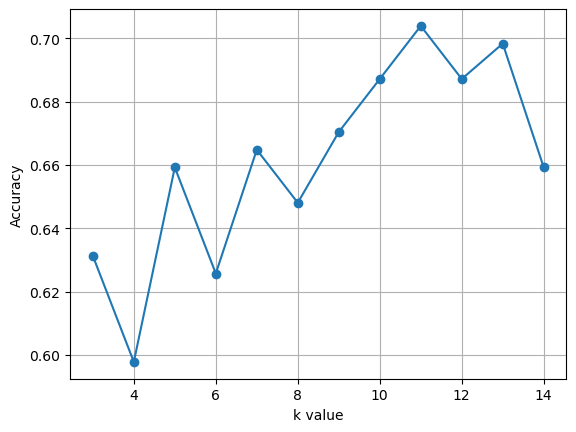

In [77]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel("Accuracy")
plt.grid()

In [78]:
classifier = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
knn_model = classifier.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
acc = accuracy_score(y_test,y_pred)

C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [32]:
acc

0.7039106145251397

In [33]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [79]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy =  0.7039106145251397
Precision =  0.7560975609756098
Recall =  0.4189189189189189
f1 score =  0.5391304347826087


# SVM Model

In [35]:
from sklearn.svm import SVC
svmclf=SVC(kernel = 'rbf')
svm_model = svmclf.fit(x_train,y_train)

In [36]:
y_pred_svm=svm_model.predict(x_test)

In [84]:
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [37]:
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.6927374301675978


# K-fold Cross Validation

For kNN Model

In [38]:
from sklearn.model_selection import KFold

In [57]:
kfold_validator = KFold(10)

In [58]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index : ',train_index)
    print('Testing index : ',test_index)

Training index :  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 

In [59]:
from sklearn.model_selection import cross_val_score

In [80]:
cv_score=cross_val_score(knn_model,x,y,cv=kfold_validator)

C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [81]:
cv_score

array([0.56666667, 0.66292135, 0.68539326, 0.57303371, 0.58426966,
       0.6741573 , 0.69662921, 0.66292135, 0.69662921, 0.73033708])

In [62]:
np.mean(cv_score)

0.6532958801498128

For SVM Model

In [63]:
cv_score_svm=cross_val_score(svm_model,x,y,cv=kfold_validator)

In [64]:
cv_score_svm

array([0.56666667, 0.75280899, 0.6741573 , 0.61797753, 0.64044944,
       0.69662921, 0.65168539, 0.71910112, 0.74157303, 0.75280899])

In [65]:
np.mean(cv_score_svm)

0.6813857677902622

# Stratified K-fold Cross Validation

For kNN Model

In [66]:
from sklearn.model_selection import StratifiedKFold

In [67]:
skfold_validator=StratifiedKFold()

In [68]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index : ',train_index)
    print('Testing index : ',test_index)

Training index :  [168 169 170 171 173 174 175 176 177 178 179 180 181 182 185 188 189 191
 196 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 

In [82]:
skcv_score=cross_val_score(knn_model,x,y,cv=skfold_validator)

C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\praso\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [83]:
skcv_score

array([0.62011173, 0.58988764, 0.61797753, 0.6741573 , 0.66292135])

In [71]:
np.mean(skcv_score)

0.6330111104136589

For SVM Model

In [72]:
skcv_score_svm=cross_val_score(svmclf,x,y,cv=skfold_validator)

In [73]:
skcv_score_svm

array([0.62569832, 0.64606742, 0.66853933, 0.70224719, 0.70786517])

In [74]:
np.mean(skcv_score_svm)

0.6700834850291884